1. Выберем датасет с обзорами фильмов или продуктов, который требует разметки на позитивные, негативные или нейтральные отзывы. Давайте рассмотрим датасет IMDB, содержащий обзоры фильмов, и требующий разметки на положительные и отрицательные отзывы.

Используем следующий подход:
1. Анализ текста отзыва: Разработать набор правил, основанный на ключевых словах или фразах, которые чаще всего встречаются в позитивных или негативных отзывах.
2. Сентимент анализ: Использовать предварительно обученную модель для анализа настроений (например, BERT, LSTM) для определения тональности текста.
3. Анализ оценок: Присвоить метки на основе числовой оценки, предполагая, что оценки 7 и выше являются положительными, а оценки ниже 5 - отрицательными.
4. Комбинация признаков: Сочетать различные признаки (например, ключевые слова, синтаксические структуры, длина текста и т. д.) для более точной классификации.

In [1]:
import pandas as pd

In [2]:
# Загрузка датасета
df = pd.read_csv('IMDB Dataset.csv')

In [3]:
# Функция для определения тональности текста на основе ключевых слов
def rule_based_labeling(text):
    positive_keywords = ['awesome', 'amazing', 'brilliant', 'excellent', 'fantastic', 'great']
    negative_keywords = ['awful', 'bad', 'boring', 'disappointing', 'horrible', 'terrible']
    
    for word in positive_keywords:
        if word in text.lower():
            return 'positive'
    
    for word in negative_keywords:
        if word in text.lower():
            return 'negative'
    
    return 'neutral'

In [4]:
# Применение функции к датасету
df['sentiment'] = df['review'].apply(rule_based_labeling)

In [5]:
# Сохранение размеченного датасета
df.to_csv('IMDB_labeled.csv', index=False)

In [28]:
# Проверка на наличие пустых строк в датасете
null_values = df.isnull().sum()
# Вывод общего количества пустых строк в каждом столбце
print("Общее количество пустых строк в каждом столбце:")
print(null_values)

Общее количество пустых строк в каждом столбце:
review       0
sentiment    0
dtype: int64


In [31]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,3
top,Loved today's show!!! It was a variety and not...,positive
freq,5,19564


Из предоставленной информации видно, что в столбце "review" (отзыв) имеется 49582 уникальных записей из 50000, что означает, что некоторые отзывы повторяются. Однако, пустых строк или значений отсутствует, так как общее количество значений в столбце равно общему количеству строк в датасете.

В столбце "sentiment" (тональность) присутствуют три уникальных значения, что соответствует ожидаемому, так как это классы тональности. Большинство отзывов (19564) имеют положительную тональность.

Таким образом, наличие пустых строк в датасете не обнаружено.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Из информации о датасете видно, что оба столбца содержат тип данных object, что обычно используется для текстовых данных. Общее количество строк в датасете составляет 50000, и для каждого столбца присутствуют 50000 непустых значений (non-null count), что подтверждает отсутствие пропущенных значений. Таким образом, данные в датасете полные и готовы для анализа.

In [9]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,neutral
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,neutral
4,"Petter Mattei's ""Love in the Time of Money"" is...",neutral


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [11]:
# Загрузка объединенного набора данных
df = pd.read_csv('IMDB_labeled.csv')

In [12]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = df['review']
y = df['sentiment']

In [13]:
# Преобразование текста в числовые признаки с использованием TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Ограничиваем количество признаков для ускорения обучения
X = vectorizer.fit_transform(X)

In [14]:
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Обучение модели логистической регрессии
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\Сергей\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Увеличим количество итераций (max_iter)

In [16]:
# Обучение модели логистической регрессии с увеличением количества итераций
model = LogisticRegression(max_iter=1000)  # Установка max_iter=1000
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [17]:
# Предсказание на тестовом наборе данных
y_pred = model.predict(X_test)

In [18]:
# Оценка производительности модели
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.93      0.87      0.90      2433
     neutral       0.90      0.99      0.94      3620
    positive       0.97      0.92      0.94      3947

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000




Выводы по оценке производительности модели:
1. Точность (precision):
* Для класса "negative" точность составляет 0.93, что означает, что 93% отзывов, которые модель предсказала как "negative", действительно являются негативными.
* Для класса "neutral" точность составляет 0.90, что означает, что 90% отзывов, которые модель предсказала как "neutral", действительно являются нейтральными.
* Для класса "positive" точность составляет 0.97, что означает, что 97% отзывов, которые модель предсказала как "positive", действительно являются положительными.
2. Полнота (recall):
* Для класса "negative" полнота составляет 0.87, что означает, что модель правильно классифицировала 87% негативных отзывов из всех действительно негативных.
* Для класса "neutral" полнота составляет 0.99, что означает, что модель правильно классифицировала 99% нейтральных отзывов из всех действительно нейтральных.
* Для класса "positive" полнота составляет 0.92, что означает, что модель правильно классифицировала 92% положительных отзывов из всех действительно положительных.
3. F1-мера (F1-score):
* F1-мера является гармоническим средним между точностью и полнотой и отражает баланс между ними.
* Для всех классов значение F1-меры выше 0.90, что указывает на хорошее качество классификации модели.
4. Общая оценка модели:
* Точность модели (accuracy) составляет 0.93, что означает, что модель правильно классифицировала 93% всех отзывов в тестовом наборе.
* С учетом всех метрик можно сделать вывод, что модель показывает хорошее качество и может быть полезна для анализа тональности отзывов.

In [19]:
import matplotlib.pyplot as plt

Гистограмма распределения классов, где каждый столбец представляет собой количество отзывов для каждой из трех категорий тональности (нейтральные, негативные, позитивные)

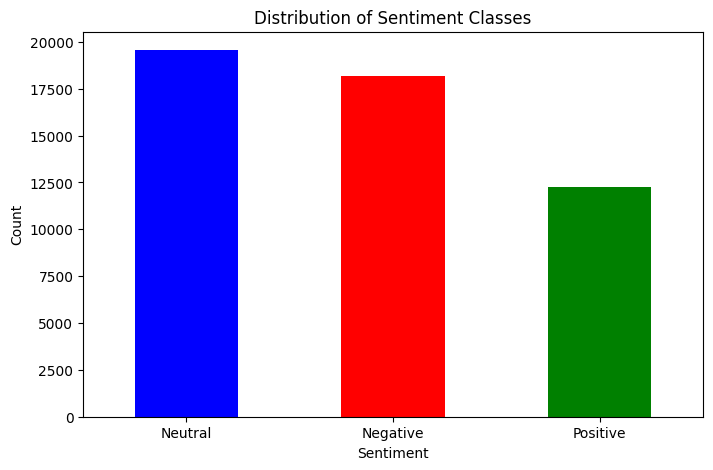

In [25]:
# Гистограмма распределения классов
plt.figure(figsize=(8, 5))
df['sentiment'].value_counts().plot(kind='bar', color=['blue', 'red', 'green'])
plt.title('Distribution of Sentiment Classes')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Neutral', 'Negative', 'Positive'], rotation=0)
plt.show()



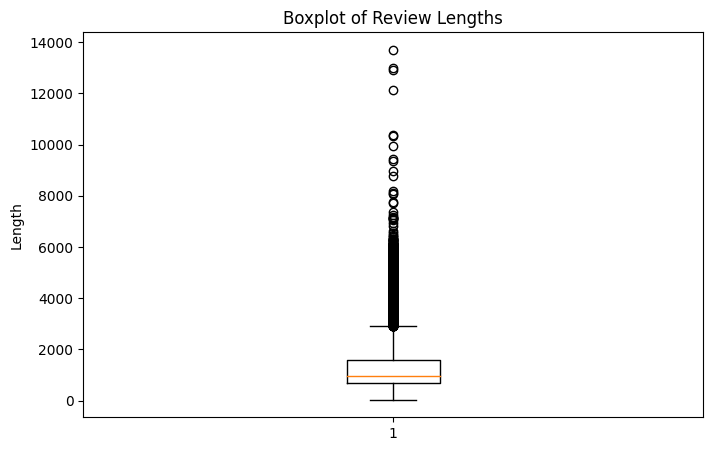

In [26]:
# Диаграмма размаха для длины текстов отзывов
review_lengths = df['review'].apply(len)
plt.figure(figsize=(8, 5))
plt.boxplot(review_lengths)
plt.title('Boxplot of Review Lengths')
plt.ylabel('Length')
plt.show()

Диаграмма размаха для длины текстов отзывов показывает большие выбросы, это может быть связано с наличием отзывов с аномально большой или маленькой длиной. 